In [4]:
import sys; sys.path.append('../')

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes

In [6]:
sns.set_palette('bright')
sns.set(rc={"lines.linewidth": 2})
sns.set_style('whitegrid')

In [7]:
from experiments.parse_results import parse_results

# EigenWorms

## Heatmap
Heatmap showing accuracy against depth/step.

In [14]:
df = parse_results('UEA', 
                   'EigenWorms', 
                   'main_adjoint', 
                   sort_key='test',
                   average_over=['depth', 'step'], 
                   print_frame=False, 
                   pretty_std=False)

In [15]:
df = df.iloc[[True if int(x) in [1, 2, 4, 8, 16, 32, 64, 128, 256, 512] else False for x in df.index.get_level_values(1)]]

In [16]:
# Convert to a matrix of scores
df_acc_test = df['acc.test'].reset_index().pivot(index='depth', columns='step')
df_acc_test.columns = [int(x) for x in df_acc_test.columns.droplevel(0)]
df_acc_test = df_acc_test[sorted(df_acc_test.columns)]

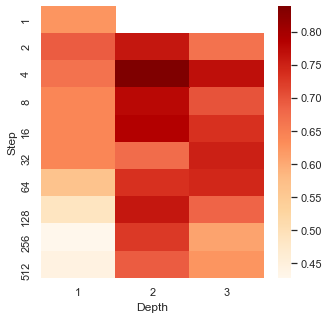

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
sns.heatmap(df_acc_test.T, cmap="OrRd", ax=ax)
ax.set_xlabel('Depth')
ax.set_ylabel('Step')

plt.savefig('./figures/eigenworms_heatmap.png', dpi=300, bbox_inches='tight')

## Time and Accuracy

In [25]:
time_data = df['elapsed_time'].reset_index().apply(pd.to_numeric).sort_values(['depth', 'step'])
time_data['elapsed_time'] = np.log(time_data['elapsed_time'])
time_data['step'] = np.log(time_data['step'])
time_data = time_data.apply(pd.to_numeric)

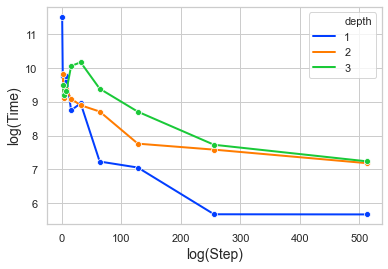

In [24]:
fig, ax = plt.subplots()

# Plot the data
sns.lineplot(data=time_data, x='step', y='elapsed_time', hue='depth', ax=ax, marker='o', palette='bright')
ax.set_xlabel('log(Step)', fontsize=14)
ax.set_ylabel('log(Time)', fontsize=14)

plt.savefig('./figures/eigenworms_log_time.png', dpi=300, bbox_inches='tight')

## Both plots

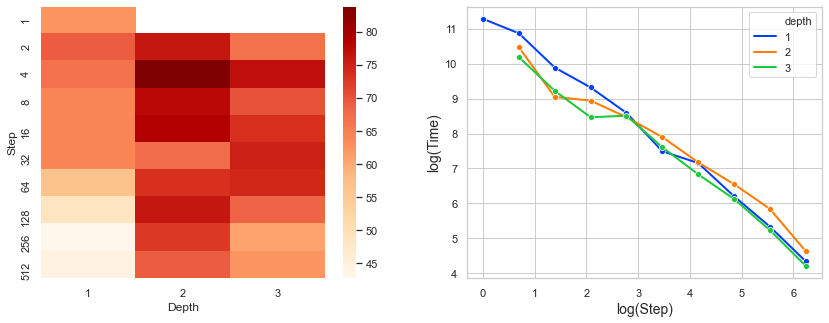

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Heatmap
sns.heatmap(df_acc_test.T * 100, cmap="OrRd", ax=ax[0])
ax[0].set_xlabel('Depth')
ax[0].set_ylabel('Step')

# Times
sns.lineplot(data=time_data, x='step', y='elapsed_time', hue='depth', ax=ax[1], marker='o', palette='bright')
ax[1].set_xlabel('log(Step)', fontsize=14)
ax[1].set_ylabel('log(Time)', fontsize=14)

plt.savefig('./figures/eigenworms.png', dpi=300, bbox_inches='tight')

# BIDMC

In [18]:
sns.cm.OrRd

AttributeError: module 'seaborn.cm' has no attribute 'OrRd'

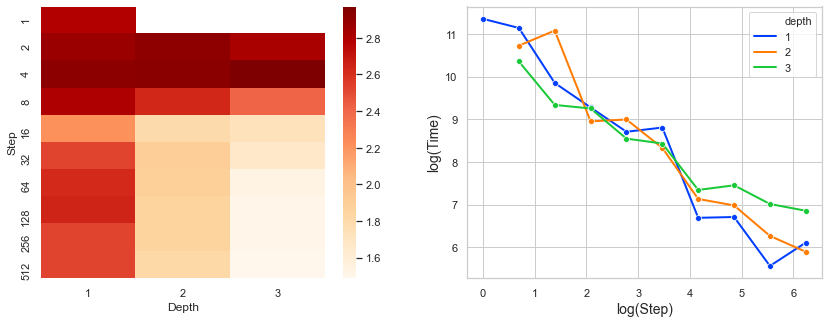

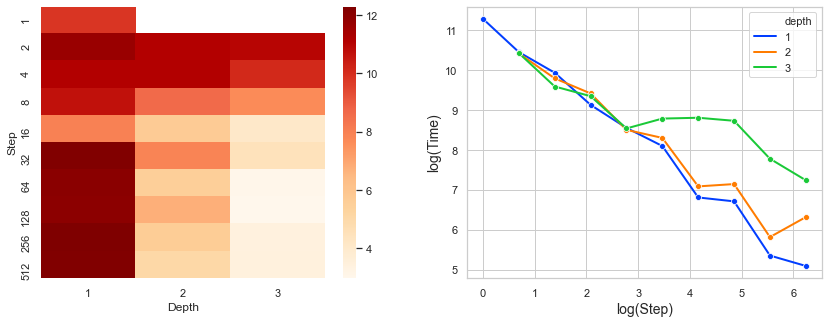

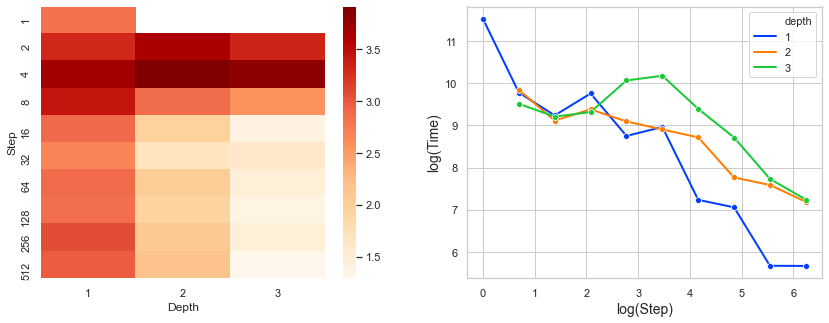

In [21]:
for name in ['RR', 'HR', 'SpO2']:
    df = parse_results('TSR', 
                       'BIDMC32{}'.format(name), 
                       'main_adjoint', 
                       sort_key='test',
                       average_over=['depth', 'step'], 
                       print_frame=False, 
                       pretty_std=False)
    df = df.iloc[[True if int(x) in [1, 2, 4, 8, 16, 32, 64, 128, 256, 512] else False for x in df.index.get_level_values(1)]]
    
    # Convert to a matrix of scores
    df_acc_test = df['loss.test'].reset_index().pivot(index='depth', columns='step')
    df_acc_test.columns = [int(x) for x in df_acc_test.columns.droplevel(0)]
    df_acc_test = df_acc_test[sorted(df_acc_test.columns)]
    
    # Time info
    time_data = df['elapsed_time'].reset_index().apply(pd.to_numeric).sort_values(['depth', 'step'])
    time_data['elapsed_time'] = np.log(time_data['elapsed_time'])
    time_data['step'] = np.log(time_data['step'])
    time_data = time_data.apply(pd.to_numeric)
    
    # Plot and save
    fig, ax = plt.subplots(1, 2, figsize=(14, 5))

    # Heatmap
    sns.heatmap(df_acc_test.T, cmap="OrRd", ax=ax[0])
    ax[0].set_xlabel('Depth')
    ax[0].set_ylabel('Step')

    # Times
    sns.lineplot(data=time_data, x='step', y='elapsed_time', hue='depth', ax=ax[1], marker='o', palette='bright')
    ax[1].set_xlabel('log(Step)', fontsize=14)
    ax[1].set_ylabel('log(Time)', fontsize=14)
    plt.savefig('./figures/BIDMC{}.png'.format(name), dpi=300, bbox_inches='tight')